# **Welcome to US Honey Case Handson**

In [2]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import the required dataset
df_honey = pd.read_csv(r'D:\Intellipaat\Datasets\US_honey_dataset.csv')
df_honey

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...,...
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


### Exploratory Data Analysis

In [5]:
# Information of data
df_honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


Inference :-  Here, we see all columns and there data types are correct and there's no need to change anything 
              except one, 'Unnamed: 0' is useless column in this dataframe so we need to drop the column.

In [6]:
# Removing the useless column
df_honey = df_honey.drop(['Unnamed: 0'], axis=1)
df_honey

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [7]:
# Check for the null values
df_honey.isnull().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

Inference :- Here, we see there's no null values, so nothing to do here.

In [8]:
# Check for duplicate values
df_honey.duplicated().sum()

0

Inference :- Here, we see there's no duplicate rows, so nothing to do here too.

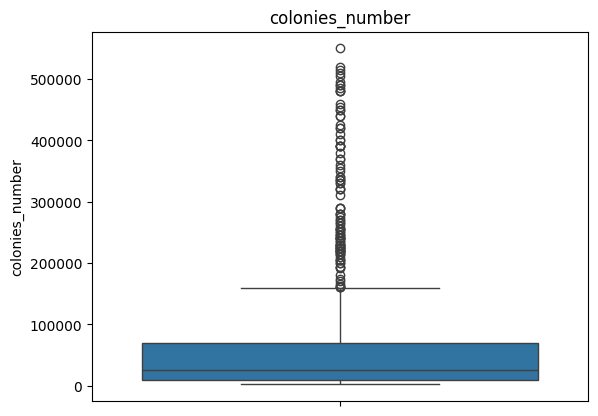

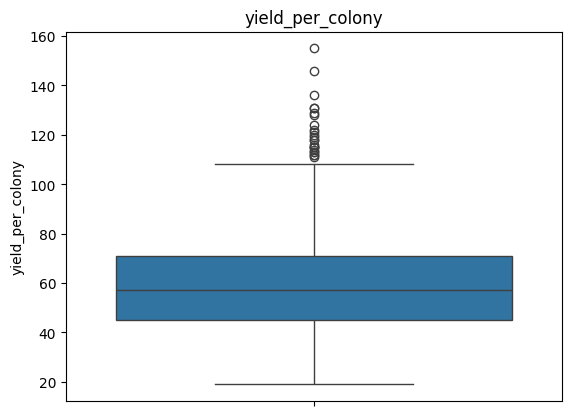

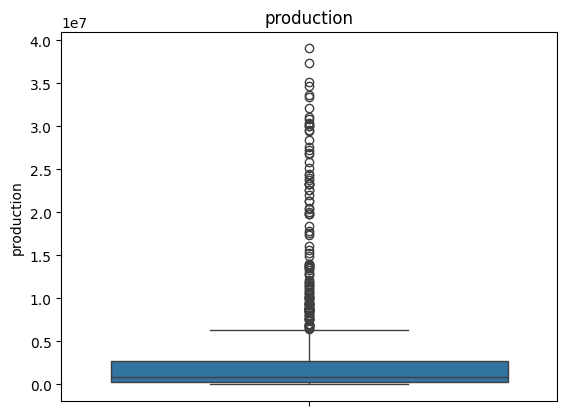

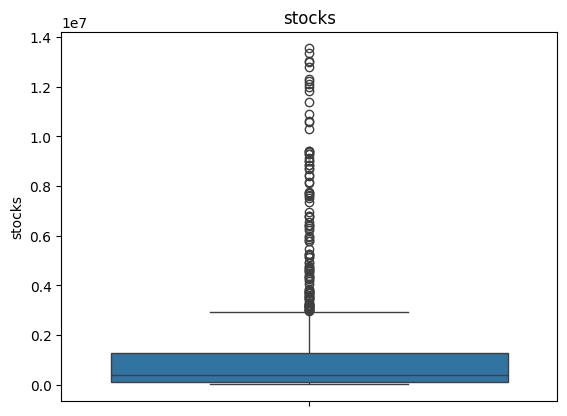

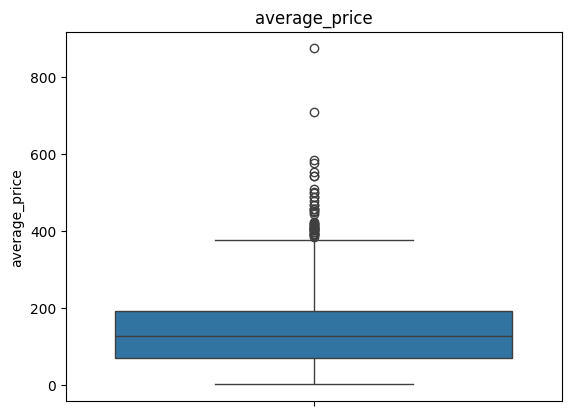

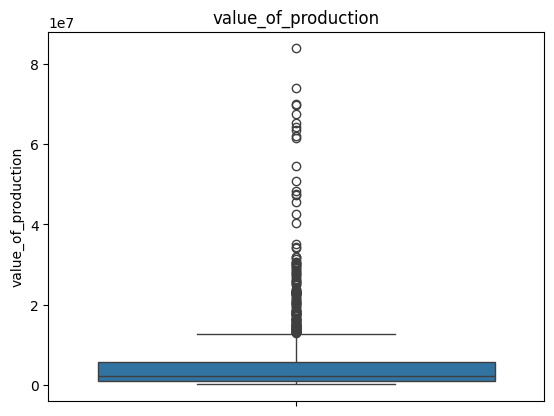

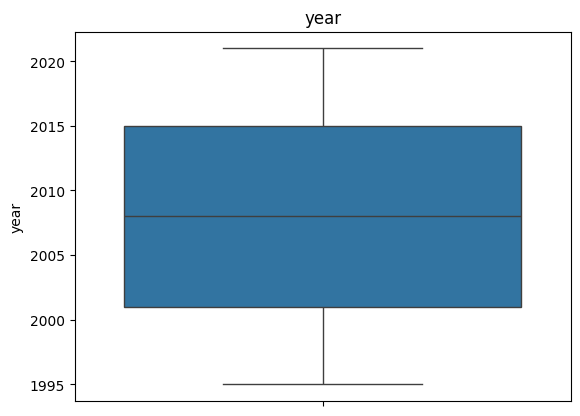

In [9]:
# Check for outliers
for col in df_honey.columns:
    if df_honey[col].dtype != 'object':
        sns.boxplot(df_honey[col])
        plt.title(col)
        plt.show()

Inference :-  Here, we see every column (except 'year') having outliers and we have small dataset, 
              so due to data loss we are not going to remove them.

Note :- If we have large number of outliers then we're not going to remove them, because it will disturb our dataset.

In [10]:
# Which states are rarely participating for honey production since last 27 years.
df_honey['state'].unique()      # Shows all unique states

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [11]:
# Shows no. of unique states
df_honey['state'].nunique()

44

In [12]:
# Total records group by states
states = df_honey['state'].value_counts()
states

state
Alabama          27
Missouri         27
Arizona          27
NewJersey        27
NewYork          27
NorthCarolina    27
NorthDakota      27
Ohio             27
Oregon           27
Pennsylvania     27
SouthDakota      27
Tennessee        27
Texas            27
Utah             27
Vermont          27
Virginia         27
Washington       27
WestVirginia     27
Wisconsin        27
Montana          27
Nebraska         27
Mississippi      27
Minnesota        27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: count, dtype: int64

Inference :-  Here, we see that Maryland, Oklahoma, SouthCarolina, & Nevada are least participating states in 
                  US honey case.

### Data Visualization

In [13]:
# For Visual purpose
label = states.index
val = states.values

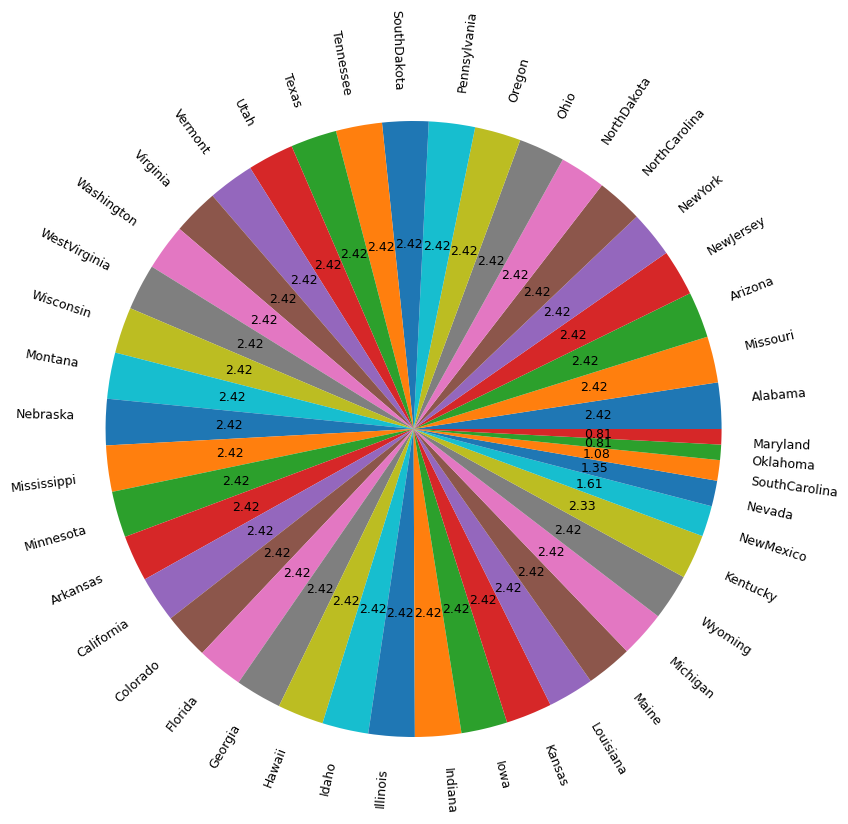

In [14]:
# Display the data in pie plot
plt.figure(figsize=(10, 10))
plt.pie(val, labels=label, autopct='%1.02f', textprops={'fontsize' : 9}, rotatelabels=True)
plt.show()

In [15]:
df_honey

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


C:\Users\vinit\AppData\Local\Temp\ipykernel_45408\4207552677.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='production', data=top_production, palette='rainbow')


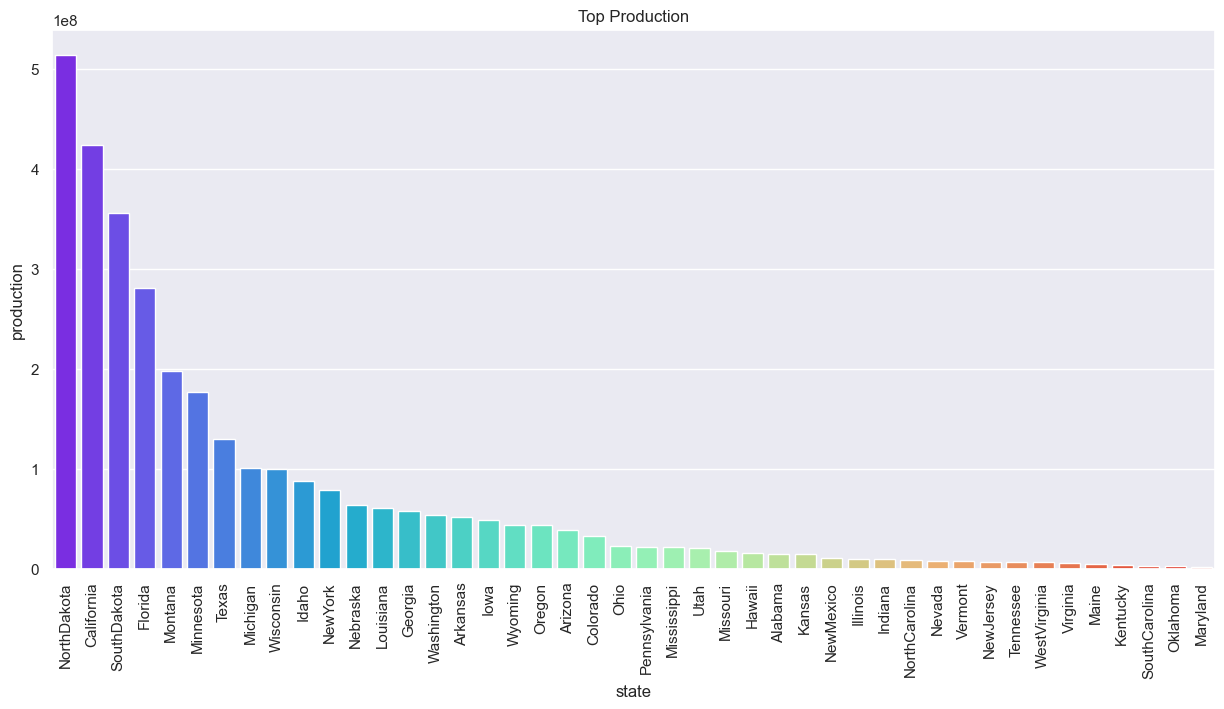

In [16]:
# Que. Which are the top 5 honey producing state ?

# Create dataframe having state & production columns.
top_production = df_honey.groupby('state').sum()['production'].reset_index()

# Arange the dataframe with respect to high production.
top_production.sort_values(by='production', ascending=False, inplace=True)

# Plot a bar plot for better visual aspects. (For all states)
# Dimensions
sns.set_theme(rc={'figure.figsize' : (15, 7)})

# Plot
sns.barplot(x='state', y='production', data=top_production, palette='rainbow')

# Labels
plt.title('Top Production')
plt.xticks(rotation=90)

# Show
plt.show()

C:\Users\vinit\AppData\Local\Temp\ipykernel_45408\4106957838.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='production', data=top_production.head(5), palette='magma')


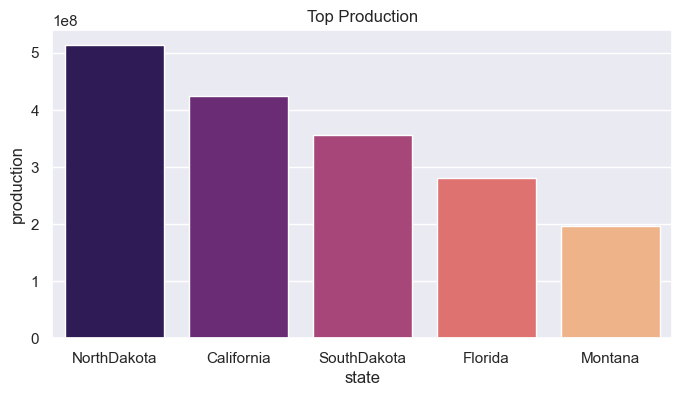

In [17]:
# Plot a bar plot for better visual aspects. (For top 5 producing states)

# Dimensions
sns.set_theme(rc={'figure.figsize' : (8, 4)})

# Plot
sns.barplot(x='state', y='production', data=top_production.head(5), palette='magma')

# Labels
plt.title('Top Production')

# Show
plt.show()

Inference :- NorthDakota, California, SouthDakota, Florida, Montana are the top 5 honey producing state.

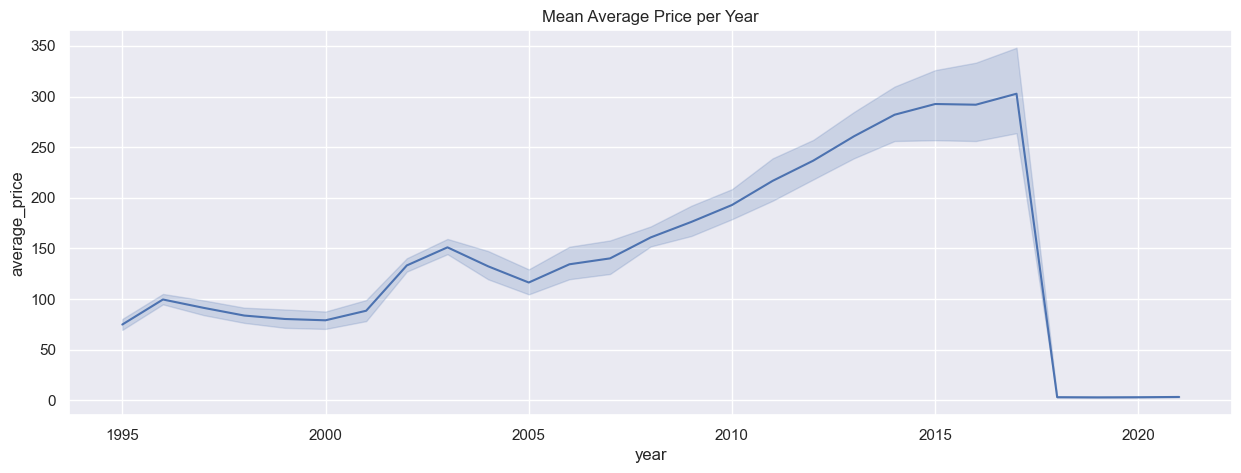

In [18]:
# Que. What is the change in mean average price of honey ?

# Create Dataframe having 'year' & 'mean of average_price per year'
# 'mapy' :- Mean of average_price per year
mapy = df_honey.groupby('year')['average_price'].mean().reset_index()

# Plot a line plot for better visual aspects.
sns.set_theme(rc={'figure.figsize' : (15, 5)})
sns.lineplot(x='year', y='average_price', data=df_honey)
plt.title('Mean Average Price per Year')
plt.show()

Inference :- The average price going up from 2005 and in 2017 was its peak, then sudden downfall and comes
             to its all time lowest price.

C:\Users\vinit\AppData\Local\Temp\ipykernel_45408\4293359993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='production', data=production_per_year, palette='rainbow')


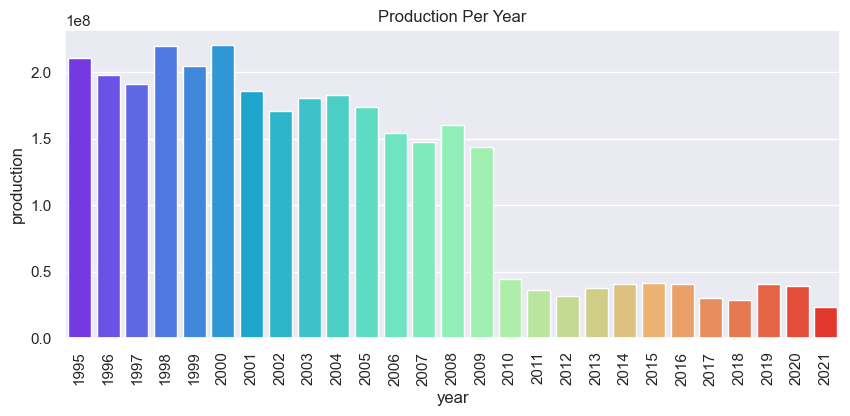

In [19]:
# Que. Which was the year when production of honey in whole US was the highest ?

# Create dataframe having 'year' & total production per year
# Arange with respect to higher production
production_per_year = df_honey.groupby('year')['production'].sum().sort_values(ascending=False).reset_index()

# Plot a barplot for better visual aspects.
sns.set_theme(rc={'figure.figsize' : (10, 4)})
sns.barplot(x='year', y='production', data=production_per_year, palette='rainbow')
plt.title('Production Per Year')
plt.xticks(rotation=90)
plt.show()

Inference :- In the year 2000 the honey production was highest in whole US.

In [20]:
# Que. From the above inference we get the production was highest in the year 2000, 
# now let infer which state was having highest contribution in that year.

# Create dataframe having record of all states and and their contribution in year 2000
contribution_in_2000 = df_honey[df_honey['year'] == 2000]

# Sort the values in descending order with respect to production
contribution_in_2000.sort_values(by='production', ascending=False, inplace=True)

# Reset the index
contribution_in_2000.reset_index()

C:\Users\vinit\AppData\Local\Temp\ipykernel_45408\1825747206.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contribution_in_2000.sort_values(by='production', ascending=False, inplace=True)


,index,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,245,NorthDakota,290000,115,33350000,13340000,56.0,18676000,2000
1,220,California,440000,70,30800000,11396000,58.0,17864000,2000
2,250,SouthDakota,235000,121,28435000,12796000,57.0,16208000,2000
3,222,Florida,232000,105,24360000,2923000,54.0,13154000,2000
4,235,Minnesota,150000,90,13500000,3105000,57.0,7695000,2000
5,238,Montana,148000,86,12728000,5982000,59.0,7510000,2000
6,252,Texas,105000,79,8295000,2986000,57.0,4728000,2000
7,258,Wisconsin,84000,90,7560000,4385000,68.0,5141000,2000
8,234,Michigan,72000,75,5400000,2970000,60.0,3240000,2000
9,219,Arkansas,55000,93,5115000,3529000,57.0,2916000,2000


C:\Users\vinit\AppData\Local\Temp\ipykernel_45408\4188985941.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='production', data=contribution_in_2000, palette='rainbow')


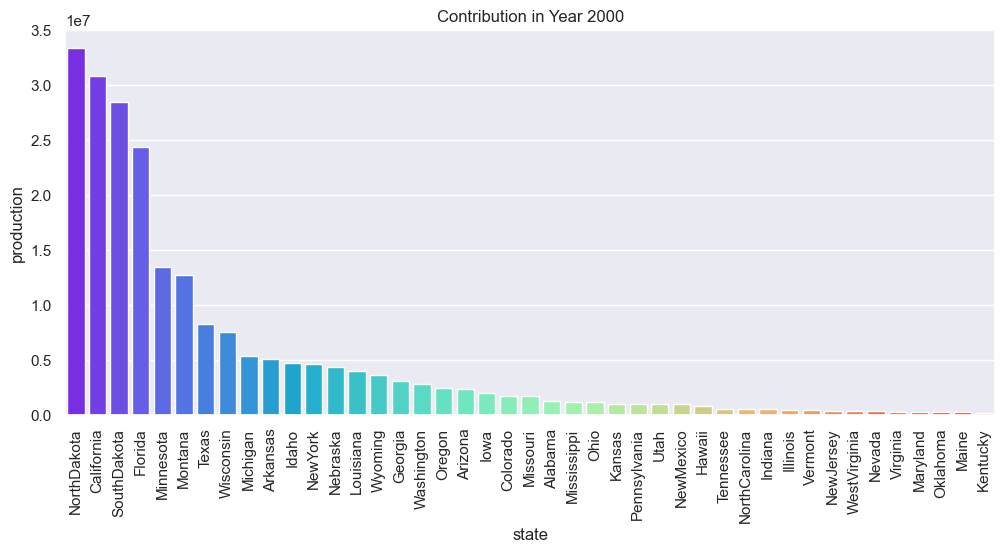

In [21]:
# Plot a barplot for better visual aspects.

sns.set_theme(rc={'figure.figsize' : (12, 5)})
sns.barplot(x='state', y='production', data=contribution_in_2000, palette='rainbow')
plt.title('Contribution in Year 2000')
plt.xticks(rotation=90)
plt.show()

Inference :- 'NorthDakota' has contributed the most in the year 2000 followed by 'California'.

C:\Users\vinit\AppData\Local\Temp\ipykernel_45408\1975400206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contribution_in_2000.sort_values(by='colonies_number', ascending=False, inplace=True)
C:\Users\vinit\AppData\Local\Temp\ipykernel_45408\1975400206.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='colonies_number', data=contribution_in_2000, palette='rainbow')


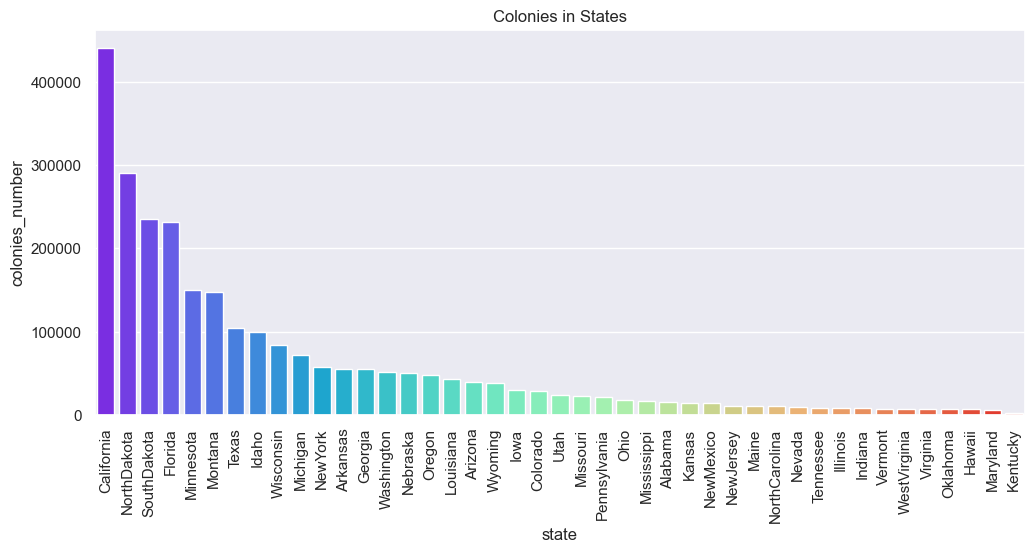

In [22]:
# Que. Which state has highest number of colonies in the year 2000 ?

# Arange the previously used df(contribution_in_2000) with respect to higher number of colonies.
contribution_in_2000.sort_values(by='colonies_number', ascending=False, inplace=True)

# Plot a barplot for better visual aspects.
sns.set_theme(rc={'figure.figsize' : (12, 5)})
sns.barplot(x='state', y='colonies_number', data=contribution_in_2000, palette='rainbow')
plt.title('Colonies in States')
plt.xticks(rotation=90)
plt.show()

Inference :- 'California' has the most number of colonies in the year 2000.

END

---